# Exploratory Data

- most offensively successful
-most defensively successful
- visualization of court with each made shot, colored by whether the team was offensively successful during that game or not

### Most Successful Offenses and Defenses

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

df = pd.read_csv("combined_data.csv")

df_shoot = df[df["shooting_play"] == True]

off = (
    df_shoot
    .groupby("play_team")
    .agg(
        shots_attempted = ("scoring_play", "count"),
        shots_made      = ("scoring_play", "sum")
    )
)
off["fg_pct"] = off["shots_made"] / off["shots_attempted"]
off = off.sort_values("fg_pct", ascending=False)
print("=== Offensive Rankings ===")
print(off)

df_shoot["defensive_team"] = df_shoot.apply(
    lambda r: r["away_team"] if r["play_team"] == r["home_team"] else r["home_team"],
    axis=1
)

def_ = (
    df_shoot
    .groupby("defensive_team")
    .agg(
        opp_shots_attempted = ("scoring_play", "count"),
        opp_shots_made      = ("scoring_play", "sum")
    )
)
def_["opp_fg_pct"]        = def_["opp_shots_made"] / def_["opp_shots_attempted"]
def_["defensive_success"] = 1 - def_["opp_fg_pct"]
def_ = def_.sort_values("defensive_success", ascending=False)
print("\n=== Defensive Rankings ===")
print(def_)


=== Offensive Rankings ===
                           shots_attempted  shots_made    fg_pct
play_team                                                       
Virginia Tech Hokies                   158          90  0.569620
Tennessee Lady Volunteers              158          89  0.563291
Drake Bulldogs                          68          38  0.558824
Arizona Wildcats                       147          81  0.551020
Iowa State Cyclones                    167          90  0.538922
...                                    ...         ...       ...
Norfolk State Spartans                  79          28  0.354430
Fairfield Stags                         70          24  0.342857
Eastern Washington Eagles               75          24  0.320000
Sacred Heart Pioneers                   73          23  0.315068
Marshall Thundering Herd                86          24  0.279070

[68 rows x 3 columns]

=== Defensive Rankings ===
                           opp_shots_attempted  opp_shots_made  opp_fg_pct  \

<ipython-input-1-dbc02d89a5b8>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shoot["defensive_team"] = df_shoot.apply(


                    play_team  total_shots  made_shots  shooting_percentage
66       Virginia Tech Hokies          158          90             0.569620
54  Tennessee Lady Volunteers          158          89             0.563291
9              Drake Bulldogs           68          38             0.558824
1            Arizona Wildcats          147          81             0.551020
21        Iowa State Cyclones          167          90             0.538922


<ipython-input-26-2c014a9faad1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_teams, x='play_team', y='shooting_percentage', palette="Oranges")


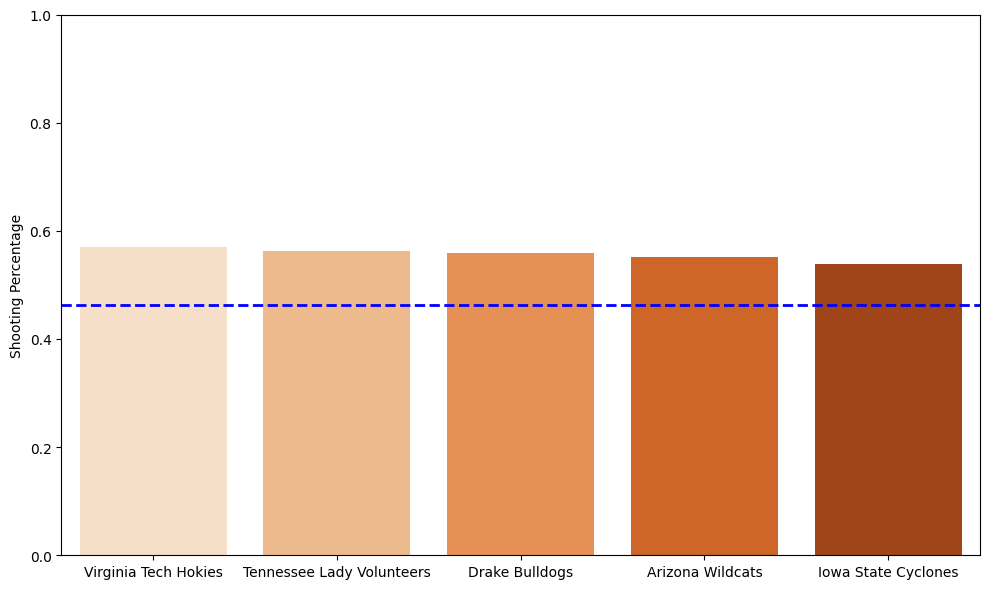

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#teams with best shooting across tournament
shooting_plays = df[df['shooting_play'] == True]

team_shooting = shooting_plays.groupby('play_team').agg(
    total_shots=('shooting_play', 'count'),
    made_shots=('scoring_play', 'sum')
).reset_index()

team_shooting['shooting_percentage'] = team_shooting['made_shots'] / team_shooting['total_shots']

top5_teams = team_shooting.sort_values(by='shooting_percentage', ascending=False).head(5)

print(top5_teams)
average_shooting_percentage = team_shooting['shooting_percentage'].mean()


plt.figure(figsize=(10,6))
palette = sns.color_palette(["#1f77b4", "#ff7f0e"])
sns.barplot(data=top5_teams, x='play_team', y='shooting_percentage', palette="Oranges")

plt.axhline(average_shooting_percentage, color='blue', linestyle='--', linewidth=2, label=f'Avg: {average_shooting_percentage:.2%}')

plt.title("", fontsize=16)
plt.ylabel("Shooting Percentage")
plt.xlabel("")
plt.ylim(0, 1)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()



### Most successful shot locations (based on x and y coordinates from ESPN data), shown on an approximation of a court

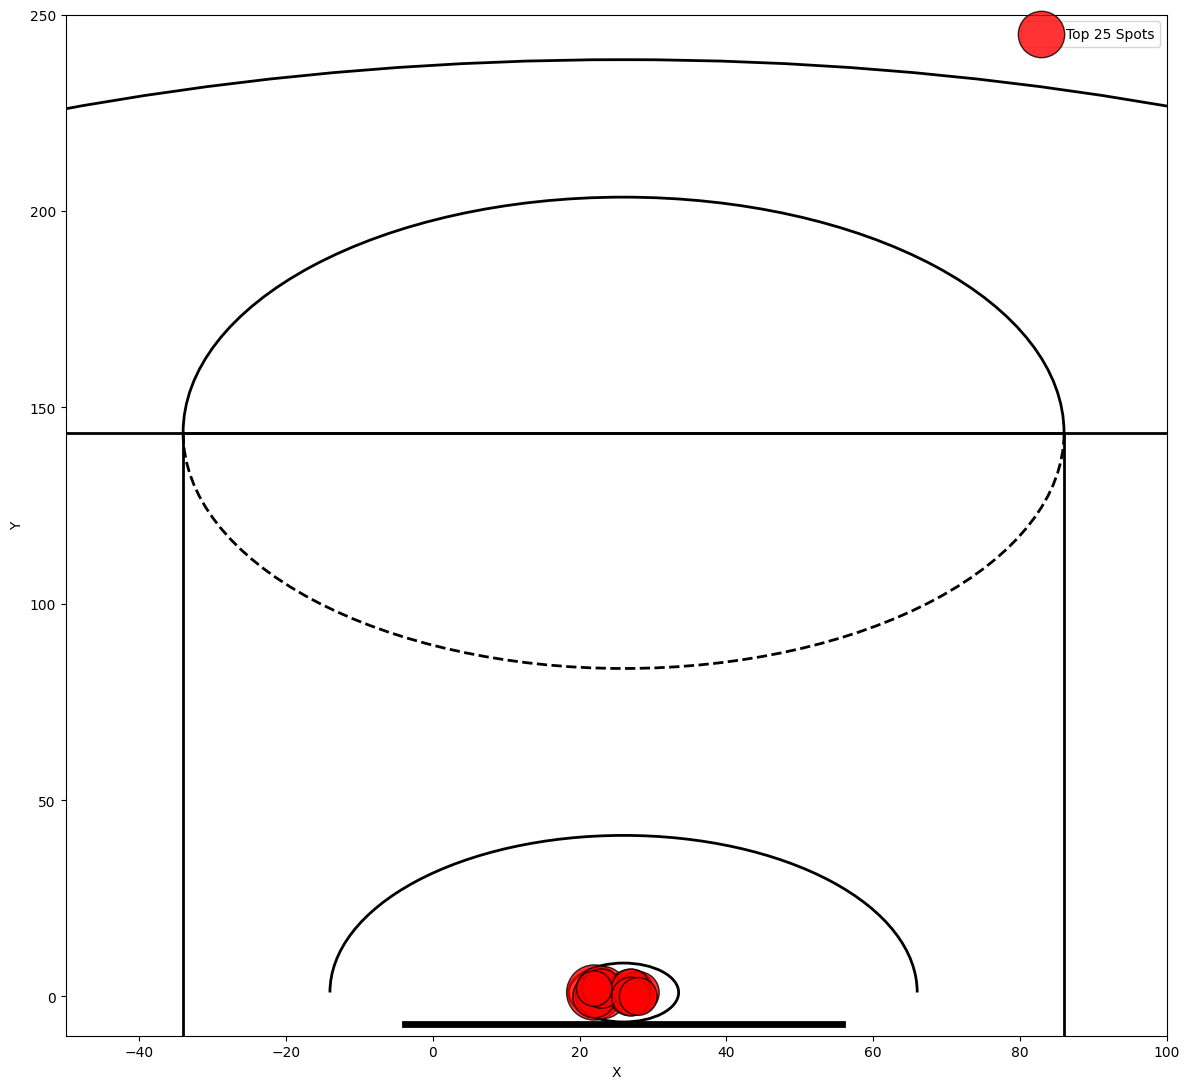

In [ ]:

fig, ax = plt.subplots(figsize=(12, 11))

def draw_court(ax=None, color='black', lw=2, center_x=26, center_y=1):
    if ax is None:
        ax = plt.gca()
    hoop = Circle((center_x, center_y), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((center_x - 30, center_y - 7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((center_x - 80, center_y - 47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((center_x - 60, center_y - 47.5), 120, 190, linewidth=lw, color=color, fill=False)
    top_free_throw = Arc((center_x, center_y + 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color)
    bottom_free_throw = Arc((center_x, center_y + 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((center_x, center_y), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    corner_three_a = Rectangle((center_x - 220, center_y - 47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((center_x + 220, center_y - 47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((center_x, center_y), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a, corner_three_b, three_arc]
    for element in court_elements:
        ax.add_patch(element)

    return ax


draw_court(ax, center_x=26, center_y=1)

sizes = top_25_shots['count'] * 10


plt.scatter(top_25_shots['shot_x'], top_25_shots['shot_y'],
            s=sizes, c='red', edgecolors='black', alpha=0.8, label='Top 25 Spots')

plt.xlim(-50, 100)
plt.ylim(-10, 250)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("")
plt.legend()
plt.tight_layout()
plt.show()
